In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006.0,Developing,123.0,8,0.97,122.652333,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
1,1,Croatia,2006.0,Developed,113.0,0,11.83,1555.651986,NaN,1.0,58.1,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,75.9
2,2,Montenegro,2007.0,Developing,125.0,0,4.98,678.518894,9.0,0.0,57.2,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,74.2
3,3,Bahrain,2014.0,Developing,7.0,0,1.57,367.255674,98.0,46.0,62.9,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,76.8
4,4,Kenya,2000.0,Developing,428.0,77,1.51,0.681686,NaN,21002.0,14.4,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,51.9


## 1) Data Exploration

In [3]:
df.shape

(2938, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2938 non-null   int64  
 1   Nation                            2937 non-null   object 
 2   Survey_Year                       2936 non-null   float64
 3   Country_Category                  2935 non-null   object 
 4   Mortality_Adults                  2925 non-null   float64
 5   Infant_Deaths_Count               2938 non-null   int64  
 6   Alcohol_Consumption_Rate          2744 non-null   float64
 7   Expenditure_Percentage_GDP        2938 non-null   float64
 8   Hepatitis_B_Vaccination_Coverage  2385 non-null   float64
 9   Measles_Infection_Count           2936 non-null   float64
 10  Body_Mass_Index_Avg               2904 non-null   float64
 11  Polio_Vaccination_Coverage        2919 non-null   float64
 12  Total_

In [5]:
df['Country_Category'].value_counts()

Country_Category
Developing    2423
Developed      512
Name: count, dtype: int64

In [6]:
df['Nation'].value_counts()

Nation
Syrian Arab Republic     16
Djibouti                 16
Ethiopia                 16
El Salvador              16
Bulgaria                 16
                         ..
Saint Kitts and Nevis     1
San Marino                1
Niue                      1
Marshall Islands          1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0                            0
Nation                                1
Survey_Year                           2
Country_Category                      3
Mortality_Adults                     13
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate            194
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    553
Measles_Infection_Count               2
Body_Mass_Index_Avg                  34
Polio_Vaccination_Coverage           19
Total_Health_Expenditure            227
Diphtheria_Vaccination_Coverage      19
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              448
Total_Population                    652
Thinness                             34
Life_Expectancy_Years                10
dtype: int64

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

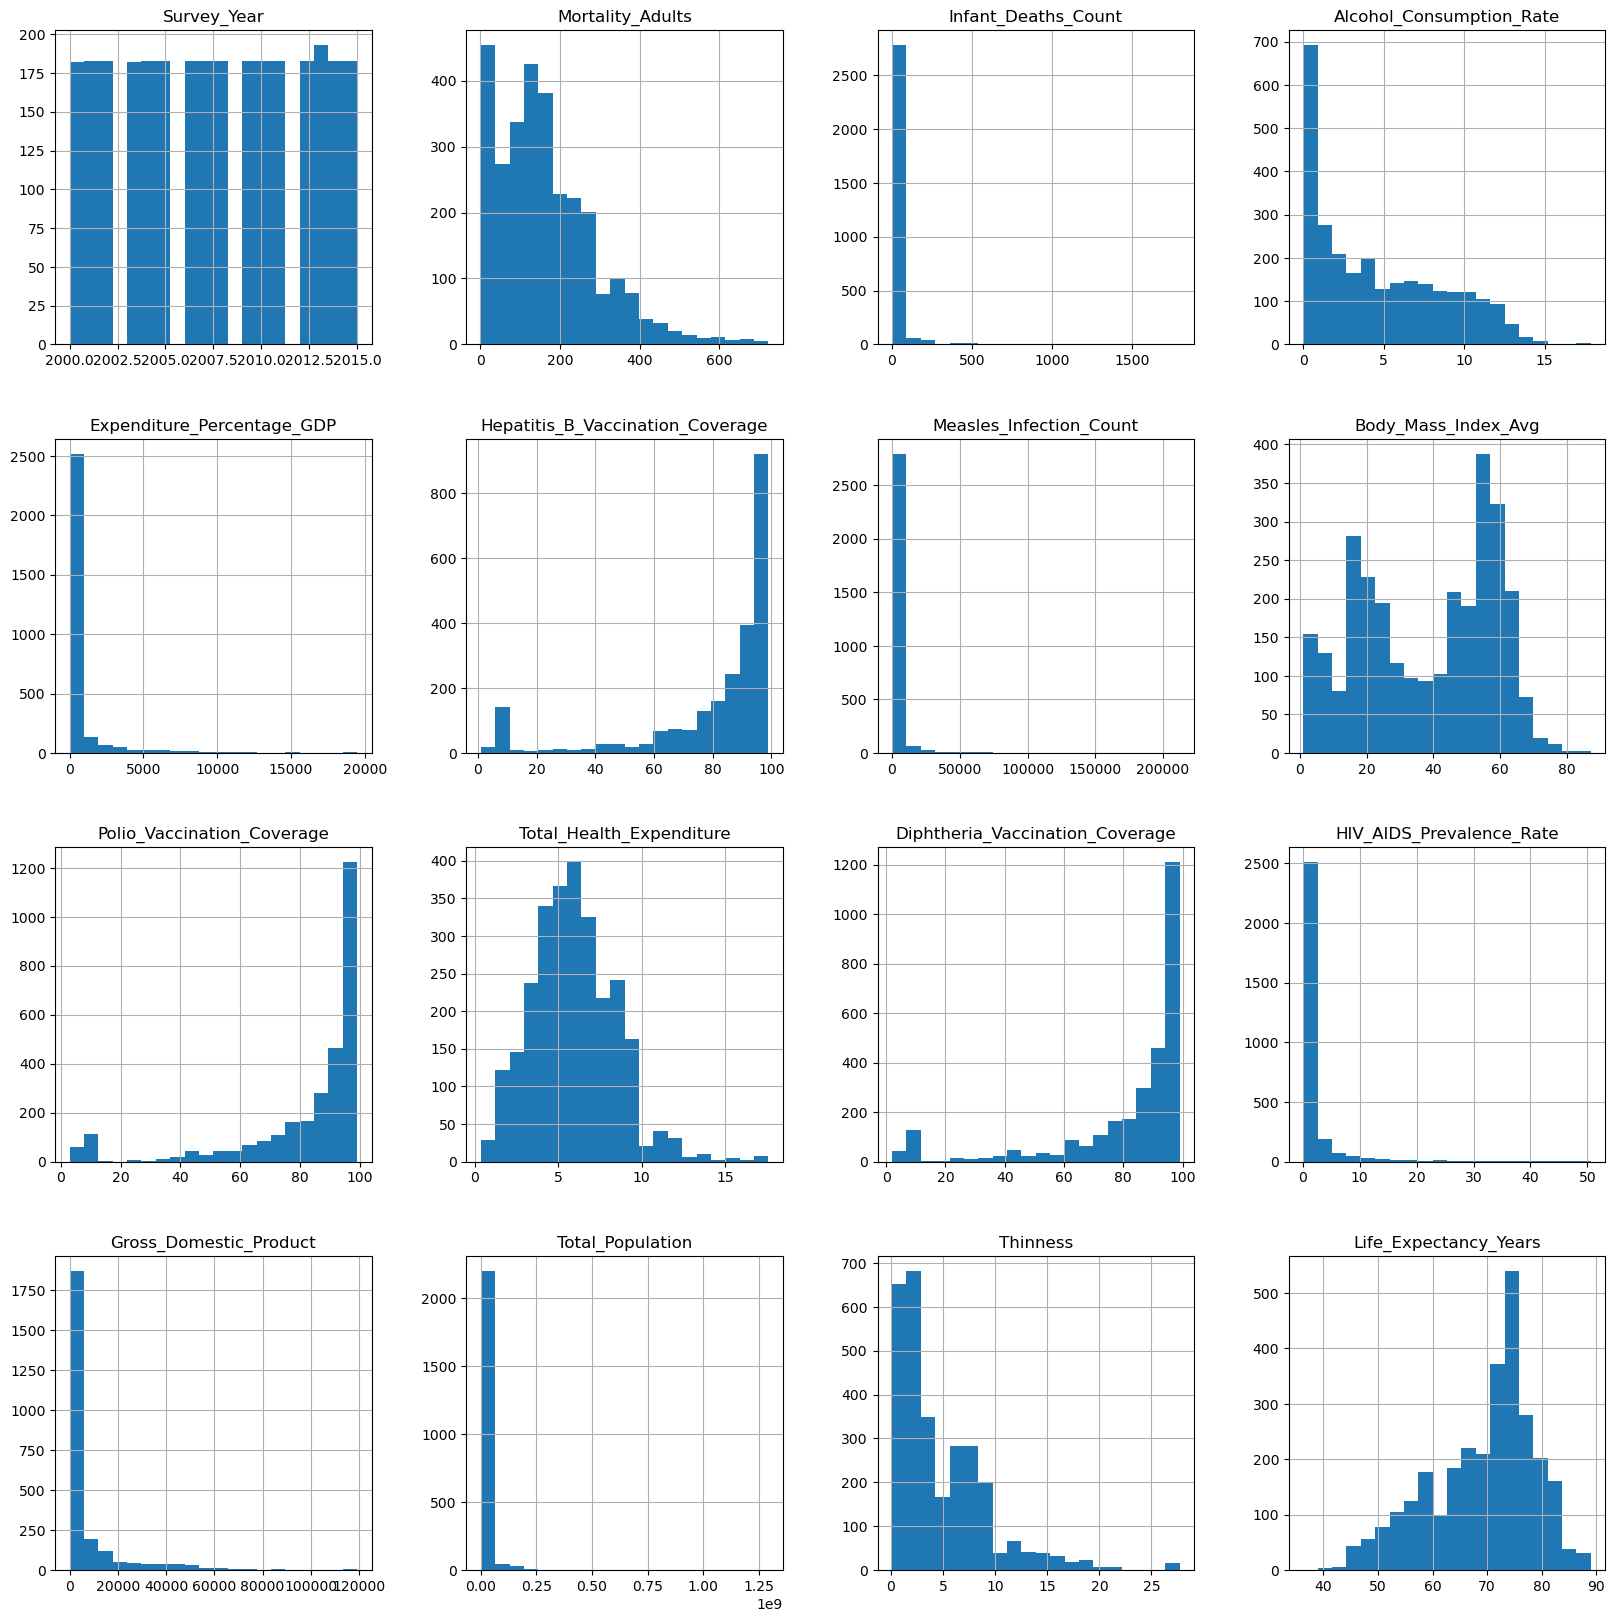

In [9]:
df.hist(bins=20, figsize=(20, 20))
plt.show() 

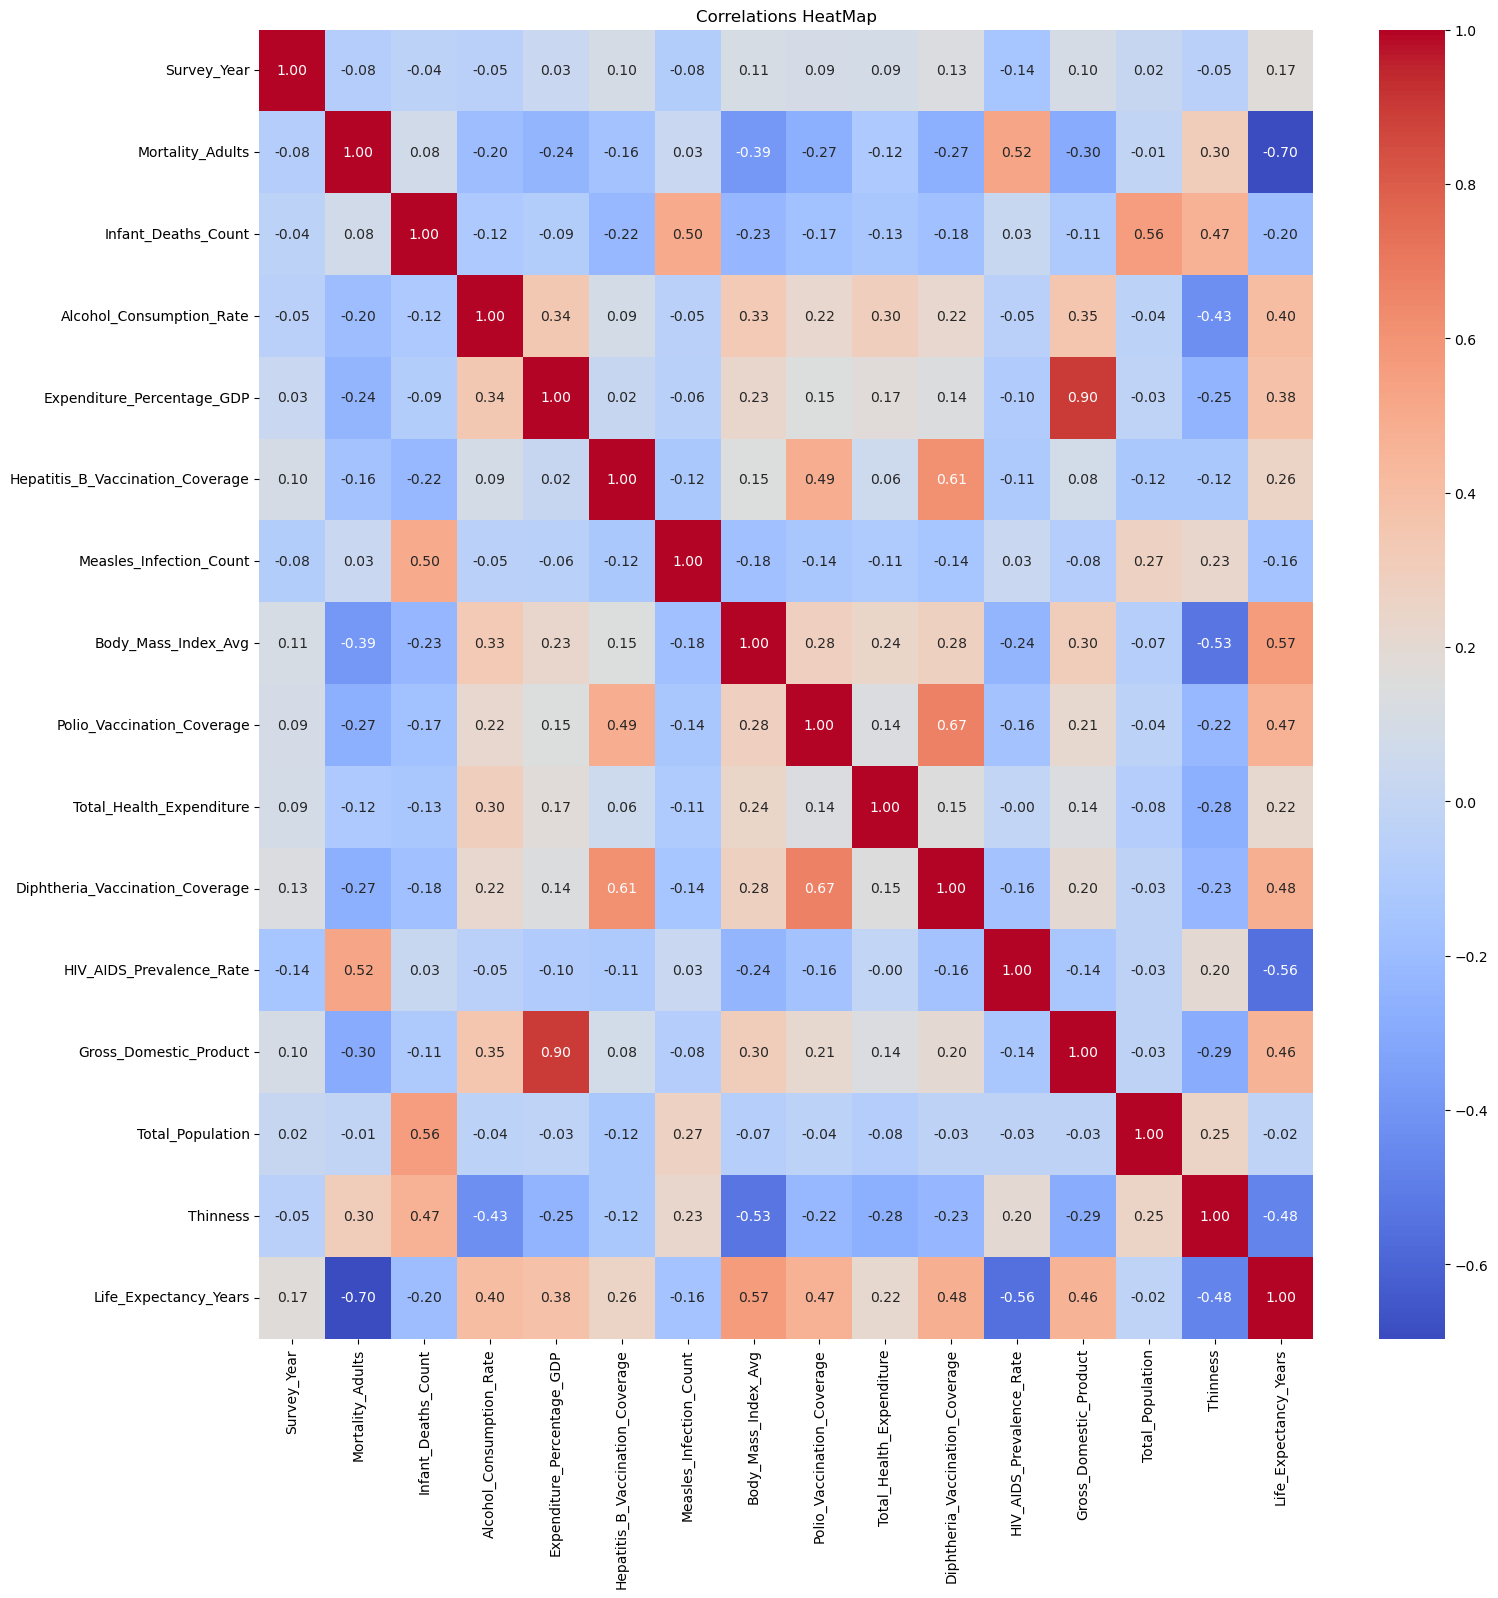

In [10]:
df_numeric = df.select_dtypes(include=["number"])
correlation_matrix = df_numeric.corr()
plt.figure(figsize= (17,17))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations HeatMap")
plt.show()

#### some insights from this : 
    - Vacination coverage positively impact the life expectancy
    - GDP and health expenditure are correlated with lower mortality and higher life expectancy.
    - Thinness and HIV/AIDS diseases reduce life expectancy and increase mortality rates.

In [11]:
from scipy.stats import zscore

def remove_outliers_zscore(data, threshold=3):
    for col in data.select_dtypes(include=['float64', 'int64']):
        data['z_scores'] = zscore(data[col])
        data = data[data['z_scores'].abs() <= threshold]  
        data.drop('z_scores', axis=1, inplace=True) 
    return data

df_cleaned = remove_outliers_zscore(df)


C:\Users\samam\AppData\Local\Temp\ipykernel_4160\2975387325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('z_scores', axis=1, inplace=True)


In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

def log_transformer(x):
    return np.log1p(x)

cat_cols = [ "Country_Category"]
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

skewed_cols = [
    "Mortality_Adults", "Infant_Deaths_Count", "Alcohol_Consumption_Rate",
    "Expenditure_Percentage_GDP", "Measles_Infection_Count",
    "HIV_AIDS_Prevalence_Rate", "Gross_Domestic_Product", "Total_Population"
]
skewed_pipline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(log_transformer, validate=False),
    StandardScaler()
)

range_cols = [
    "Hepatitis_B_Vaccination_Coverage", "Polio_Vaccination_Coverage",
    "Diphtheria_Vaccination_Coverage"
]
range_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler()
)

standard_cols = [
    "Body_Mass_Index_Avg", "Total_Health_Expenditure", "Thinness",
    "Life_Expectancy_Years"
]
standard_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessing = make_column_transformer(
    (cat_pipeline, cat_cols),
    (skewed_pipline, skewed_cols),
    (range_pipeline, range_cols),
    (standard_pipeline, standard_cols)
)

processed_data = preprocessing.fit_transform(df)

processed_df = pd.DataFrame(
    processed_data.toarray() if hasattr(processed_data, "toarray") else processed_data
)

processed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.087223,0.257792,-0.864518,0.304536,0.888338,-0.541994,0.001997,1.195494,0.836735,0.833333,0.061856,0.507668,-0.893454,0.358917,0.469659
1,1.0,0.0,0.005911,-1.063659,1.360112,1.232523,-0.817715,-0.541994,1.083601,-3.343108,0.928571,0.968750,0.969072,0.989306,0.427202,-0.687281,0.701055
2,0.0,1.0,0.102696,-1.063659,0.453799,0.928824,-1.030524,-0.541994,0.708776,-0.262948,0.081633,0.927083,0.927835,0.944152,0.339713,-0.619050,0.522249
3,0.0,1.0,-2.563274,-1.063659,-0.548859,0.704373,0.151545,-0.541994,1.540872,0.082651,0.989796,0.989583,0.989691,1.230125,-0.393521,0.290687,0.795718
4,0.0,1.0,1.287487,1.556545,-0.576906,-1.270070,2.025059,3.185643,-2.127566,0.431499,0.928571,0.052083,0.824742,-1.203151,-0.518504,0.995734,-1.823268
